# **Import & Load Dataset**

In [1]:
#import libarires required
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#reading our excel file
df=pd.read_excel("Apples_stock price dataset.xlsx" , sheet_name="Sheet1")

In [3]:
df

,timestamp,stock_price,nasdaq_index,sp500_index,inflation_rate,unemployment_rate,interest_rate,market_sentiment
0,2010-01-01 00:00:00,102.483571,7984.160950,2994.240923,4.585202,6.837412,1.175768,0.095094
1,2010-01-01 01:00:00,99.347236,7995.706186,2995.831788,2.628987,5.851430,1.918567,-0.241960
2,2010-01-01 02:00:00,103.315558,8000.887651,2998.119650,2.616145,6.235115,2.436716,-0.833554
3,2010-01-01 03:00:00,107.730823,7995.763963,3004.532651,3.115002,6.397255,2.369055,0.059836
4,2010-01-01 04:00:00,98.983464,8002.448861,2997.154387,4.270254,4.942654,1.929987,-0.223077
...,...,...,...,...,...,...,...,...
99995,2021-05-29 11:00:00,498.719645,507952.135502,200804.699078,3.824464,3.620599,3.323797,-0.161068
99996,2021-05-29 12:00:00,497.035439,507943.811002,200807.796915,1.753618,4.904652,2.723226,0.170113
99997,2021-05-29 13:00:00,501.968810,507932.520304,200809.969048,2.423570,4.993412,1.677252,-0.479887
99998,2021-05-29 14:00:00,498.905984,507942.053787,200807.345521,2.787465,5.861924,1.075077,0.401896


In [4]:
# Cleaning the column names
df.columns = [c.strip().lower() for c in df.columns]

In [5]:
# # checking the basic info
# print("Shape:",df.shape)

In [6]:
# print("Columns:", df.columns.tolist())

In [7]:
# df.info()

In [8]:
# df.describe()

The column counts are not consistent up to 100,000, with several columns having fewer entries. This indicates the presence of missing values in the dataset.

# **Parse DateTime & Set Index**

In [9]:
#converting the timestamp column into a actual datatime objects which might be in string/ text format
df['timestamp']=pd.to_datetime(df['timestamp'],errors='coerce')

In [10]:
#droping rows with invalid timestamps
df.dropna(subset=['timestamp']).sort_values('timestamp')

,timestamp,stock_price,nasdaq_index,sp500_index,inflation_rate,unemployment_rate,interest_rate,market_sentiment
0,2010-01-01 00:00:00,102.483571,7984.160950,2994.240923,4.585202,6.837412,1.175768,0.095094
1,2010-01-01 01:00:00,99.347236,7995.706186,2995.831788,2.628987,5.851430,1.918567,-0.241960
2,2010-01-01 02:00:00,103.315558,8000.887651,2998.119650,2.616145,6.235115,2.436716,-0.833554
3,2010-01-01 03:00:00,107.730823,7995.763963,3004.532651,3.115002,6.397255,2.369055,0.059836
4,2010-01-01 04:00:00,98.983464,8002.448861,2997.154387,4.270254,4.942654,1.929987,-0.223077
...,...,...,...,...,...,...,...,...
99995,2021-05-29 11:00:00,498.719645,507952.135502,200804.699078,3.824464,3.620599,3.323797,-0.161068
99996,2021-05-29 12:00:00,497.035439,507943.811002,200807.796915,1.753618,4.904652,2.723226,0.170113
99997,2021-05-29 13:00:00,501.968810,507932.520304,200809.969048,2.423570,4.993412,1.677252,-0.479887
99998,2021-05-29 14:00:00,498.905984,507942.053787,200807.345521,2.787465,5.861924,1.075077,0.401896


In [11]:
#makes the timestamp column to index of dataset
df.set_index('timestamp', inplace=True)

In [12]:
# df.head()

# **Keep only 4:00 AM to 8:00 PM ET (and exclude weekends)**

In [13]:
# Keeping only time between 04:00 and 20:00
df = df.between_time('04:00', '20:00')

In [14]:
# Removing Saturdays and Sundays
df = df[df.index.dayofweek < 5]  #making mon=0 , tue=1, wed=2, thur=3, fri=4 , sat=5, sun=6

In [15]:
df.head(48)

,stock_price,nasdaq_index,sp500_index,inflation_rate,unemployment_rate,interest_rate,market_sentiment
timestamp,,,,,,,
2010-01-01 04:00:00,98.983464,8002.448861,2997.154387,4.270254,4.942654,1.929987,-0.223077
2010-01-01 05:00:00,99.022103,8011.832789,3004.510779,2.321292,4.095568,1.664753,-0.828119
2010-01-01 06:00:00,108.127409,8028.157784,3010.735533,2.626140,5.447153,2.995546,-0.813849
2010-01-01 07:00:00,104.107075,8027.722289,3015.504909,4.056720,3.377880,3.276263,0.002849
2010-01-01 08:00:00,97.961085,8029.541811,3020.187389,2.099831,4.815785,1.761161,-0.634609
2010-01-01 09:00:00,103.059812,8040.445418,3023.941939,4.509695,4.716829,1.884053,-0.452717
2010-01-01 10:00:00,98.068478,8056.045268,3028.223289,4.708331,4.913421,1.715299,0.774117
2010-01-01 11:00:00,98.095471,8048.212134,3036.325757,4.074317,5.831791,2.032927,-0.368769
2010-01-01 12:00:00,101.672484,8029.145300,3032.338086,4.535430,6.591331,1.048660,0.412976


In [16]:
 #after filtering required columns which are only from 4am to 8pm everyday in dataset excling the saturday and sunday
df.shape

(50592, 7)

In [17]:
# df.describe()

After filtering the dataset to include only the records between **4:00 AM and 8:00 PM** each day, and excluding Saturdays and Sundays to match actual U.S. stock market trading hours, the dataset was reduced from **100,000 rows to 50,592 rows.**

# **Handle Missing Values (Blanks)**

In [18]:
#counting missing values
print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
stock_price          18
nasdaq_index          4
sp500_index           3
inflation_rate        4
unemployment_rate     4
interest_rate         0
market_sentiment      0
dtype: int64


Filling numeric columns logically for
stock_price ,
nasdaq_index ,
sp500_index .

Economic indicators change slowly use forward fill for inflation_rate , unemployement_rate , interest rate .

Market sentiment column can fluctuate  use mean imputation

In [19]:
# #checking exactly which row has missing values
df[df.isna().any(axis=1)]


,stock_price,nasdaq_index,sp500_index,inflation_rate,unemployment_rate,interest_rate,market_sentiment
timestamp,,,,,,,
2010-01-07 10:00:00,NaN,8768.181024,3187.264699,3.194932,6.441483,1.798886,0.260181
2010-01-11 10:00:00,NaN,9346.414410,3412.887953,3.416334,4.827741,1.682058,-0.367913
2010-01-12 05:00:00,110.776492,9372.875148,NaN,1.250073,6.298113,2.781349,0.306551
2010-01-15 10:00:00,105.573221,NaN,3608.402892,1.190810,4.267040,2.726655,0.313841
2010-01-22 04:00:00,NaN,10763.760787,3896.357941,1.719737,4.331568,1.527258,-0.424500
2010-02-04 17:00:00,121.424695,12371.442475,4557.917556,1.546872,NaN,1.542167,0.903861
2010-02-18 07:00:00,NaN,13925.332671,5263.969329,2.955403,5.233097,2.337254,0.335696
2010-02-24 13:00:00,NaN,14919.644033,5517.314104,3.632481,6.297237,1.664928,-0.783345
2010-03-16 11:00:00,115.556495,17332.014188,6363.568058,NaN,5.464320,1.135598,-0.501624


### 1. Filling missing values Time-based interpolation for stock and market
for columns stock_price , nasdaq_index , sp500_index.
Fills missing values by estimating what the value should have been at that timestamp, based on nearby known values.

In [20]:
# Filling stock_price columns logically
df['stock_price'] = df['stock_price'].interpolate(method='time')

In [21]:
#checking the stock_price column is filled or not
df.loc[['2010-01-07 10:00:00','2010-01-11 10:00:00']]

,stock_price,nasdaq_index,sp500_index,inflation_rate,unemployment_rate,interest_rate,market_sentiment
timestamp,,,,,,,
2010-01-07 10:00:00,104.685611,8768.181024,3187.264699,3.194932,6.441483,1.798886,0.260181
2010-01-11 10:00:00,112.746225,9346.414410,3412.887953,3.416334,4.827741,1.682058,-0.367913


Here the stock_price are successfully filled by interpolation

In [22]:
#similarly for nasdaq_index and sp500_index
df['nasdaq_index'] = df['nasdaq_index'].interpolate(method='time')
df['sp500_index'] = df['sp500_index'].interpolate(method='time')

### 2. Forward fill for slow-moving economic indicators
for columns inflation_rate , unemployement_rate , interest_rate.
Forward fill (ffill) replaces missing values with the last known valid value.

In [23]:
df['inflation_rate'] = df['inflation_rate'].fillna(method='ffill')
df['unemployment_rate'] = df['unemployment_rate'].fillna(method='ffill')
df['interest_rate'] = df['interest_rate'].fillna(method='ffill')


C:\Users\Nisha\AppData\Local\Temp\ipykernel_213692\3965981533.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['inflation_rate'] = df['inflation_rate'].fillna(method='ffill')
C:\Users\Nisha\AppData\Local\Temp\ipykernel_213692\3965981533.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['unemployment_rate'] = df['unemployment_rate'].fillna(method='ffill')
C:\Users\Nisha\AppData\Local\Temp\ipykernel_213692\3965981533.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['interest_rate'] = df['interest_rate'].fillna(method='ffill')


### 3. Mean imputation for market sentiment

for market_sentiment column
Replaces missing sentiment values with the average sentiment score across the dataset.

In [24]:
df['market_sentiment'] = df['market_sentiment'].fillna(df['market_sentiment'].mean())


In [25]:
#recheck wheather the all columns missing values are filled or not
df.isnull().sum()

stock_price          0
nasdaq_index         0
sp500_index          0
inflation_rate       0
unemployment_rate    0
interest_rate        0
market_sentiment     0
dtype: int64

Successfully all the columns blanks has been filled ...

In [26]:
# df.describe()

# **Handle Outliers (Don’t Drop)**

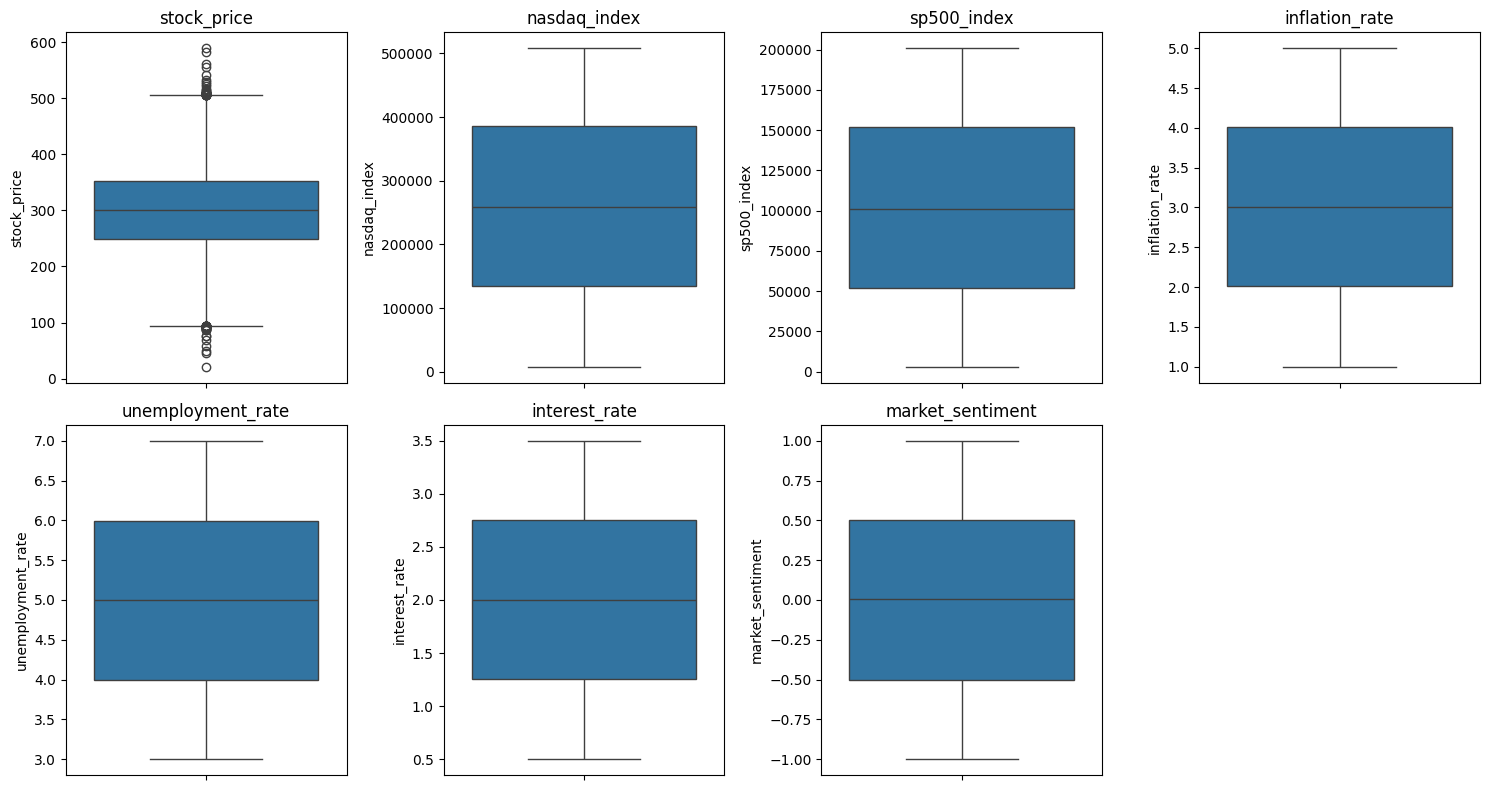

In [27]:
#generating boxplots for all numeric columns
import matplotlib.pyplot as plt
import seaborn as sns

# List of numeric columns
numeric_cols = ['stock_price', 'nasdaq_index', 'sp500_index',
                'inflation_rate', 'unemployment_rate',
                'interest_rate', 'market_sentiment']

# Set figure size
plt.figure(figsize=(15, 8))

# Create boxplots for each numeric column
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 4, i)  # 2 rows, 4 columns layout
    sns.boxplot(y=df[col])
    plt.title(col)
    plt.tight_layout()

plt.show()


From the boxplots, it is evident that outliers are present only in the stock_price column. Therefore, we will use the IQR method to handle and cap these outliers appropriately.

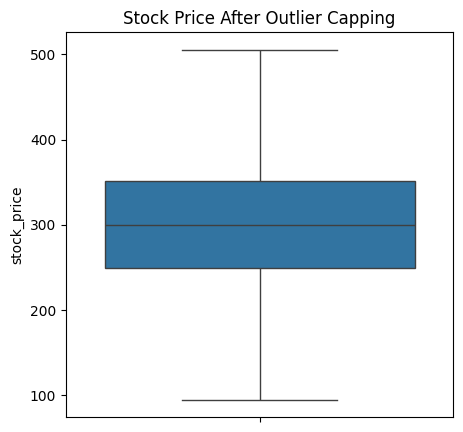

In [28]:
# Calculate Q1, Q3, and IQR for 'stock_price'
Q1 = df['stock_price'].quantile(0.25)
Q3 = df['stock_price'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Cap the outliers
df['stock_price'] = df['stock_price'].clip(lower=lower_bound, upper=upper_bound)

plt.figure(figsize=(5, 5))
sns.boxplot(y=df['stock_price'])
plt.title('Stock Price After Outlier Capping')
plt.show()

In [29]:
# #statistical anlaysis
# df.describe()

# **Exploratory Data Anlaysis**

In [30]:
# #trend, sesaonality , residual for stock_price column
# #Assuming hourly data, we can try period = 24 (daily seasonality)
# from statsmodels.tsa.seasonal import seasonal_decompose
# decomposition = seasonal_decompose(df['stock_price'], model='additive', period=24)

# trend = decomposition.trend
# seasonal = decomposition.seasonal
# residual = decomposition.resid

# # Plotting
# plt.figure(figsize=(15,12))

# plt.subplot(4,1,1)
# plt.plot(df['stock_price'], label='Original', color='blue')
# plt.title('Original Stock Price')
# plt.legend()

# plt.subplot(4,1,2)
# plt.plot(trend, label='Trend', color='orange')
# plt.title('Trend Component')
# plt.legend()

# plt.subplot(4,1,3)
# plt.plot(seasonal, label='Seasonality', color='green')
# plt.title('Seasonal Component')
# plt.legend()

# plt.subplot(4,1,4)
# plt.plot(residual, label='Residual', color='red')
# plt.title('Residual Component')
# plt.legend()

# plt.tight_layout()
# plt.show()

Period is set to 24 for hourly data with daily seasonality.

If you want weekly seasonality, set period=24*5 (5 trading days).

For monthly trends, use period=24* 5 *4 (approx 4 weeks).

here the dataset follows the Upward Linear Trend and non-seasonal

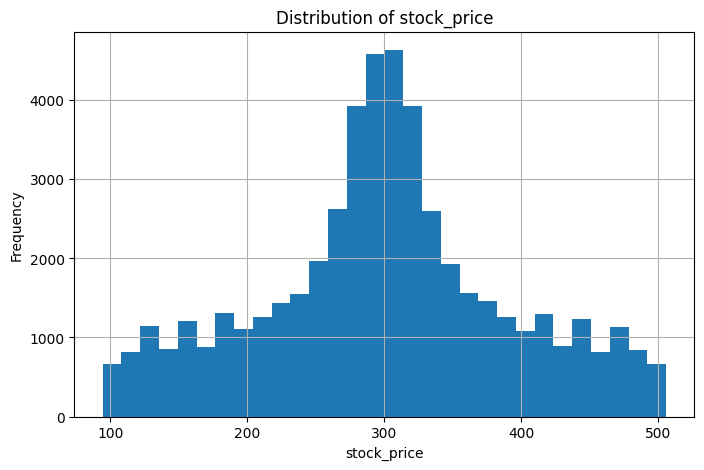

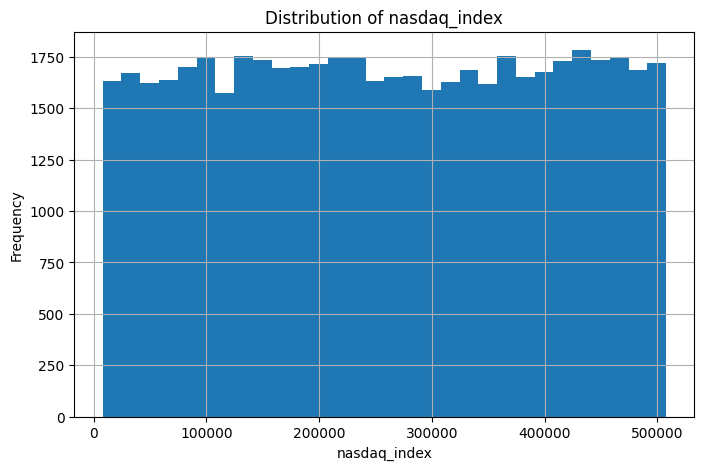

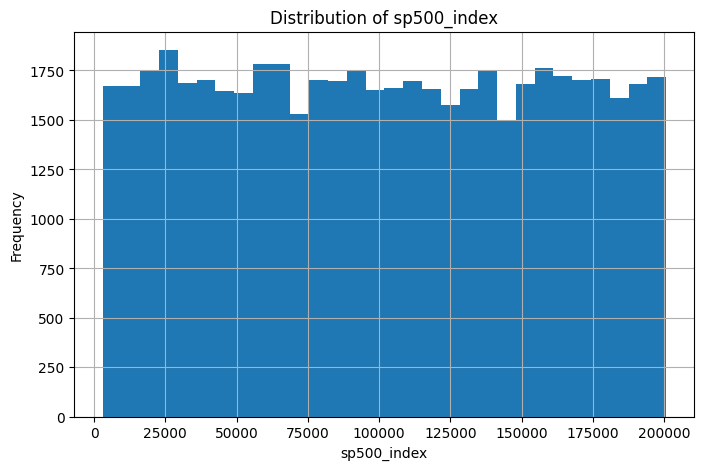

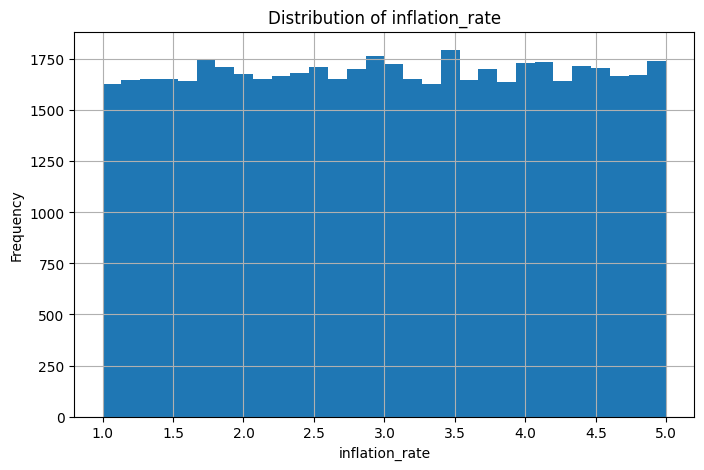

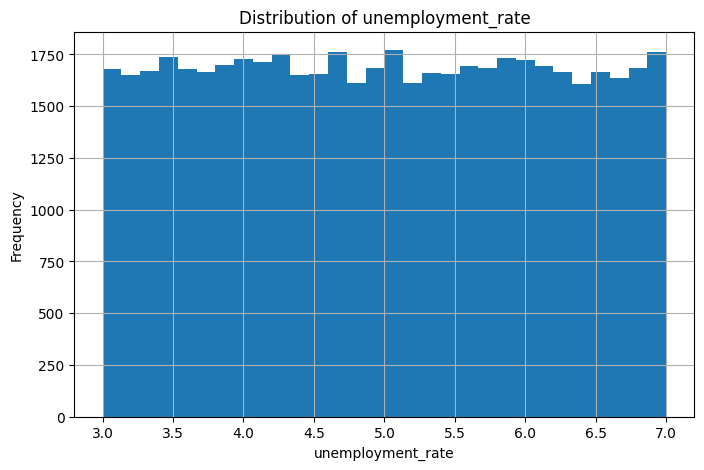

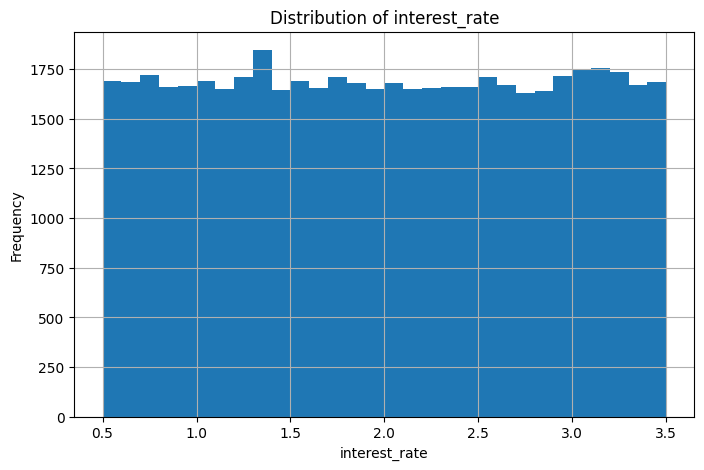

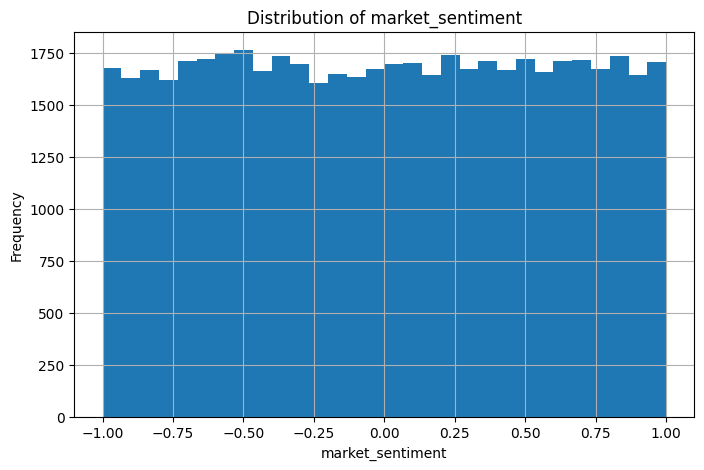

In [31]:
# #Distribution plots (Histogram)
numeric_cols = ['stock_price','nasdaq_index','sp500_index','inflation_rate','unemployment_rate','interest_rate','market_sentiment']

for col in numeric_cols:
    plt.figure(figsize=(8, 5))
    df[col].hist(bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

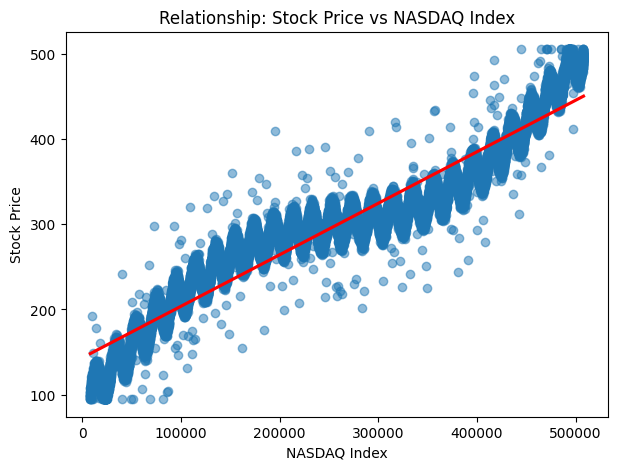

In [32]:
# # Scatter Plot: Stock Price vs NASDAQ
plt.figure(figsize=(7,5))
sns.regplot(x='nasdaq_index', y='stock_price', data=df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Relationship: Stock Price vs NASDAQ Index')
plt.xlabel('NASDAQ Index')
plt.ylabel('Stock Price')
plt.show()

The Stock Price shows a strong positive relationship with the NASDAQ Index, meaning that as the NASDAQ Index increases, the Stock Price also tends to rise.

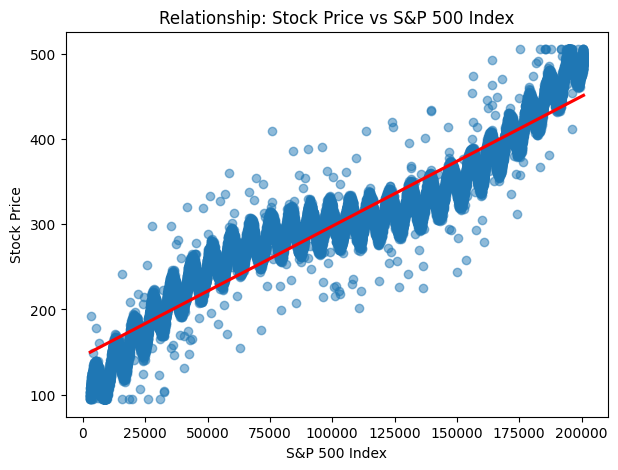

In [33]:
# #Scatter Plot: Stock Price vs S&P 500
plt.figure(figsize=(7,5))
sns.regplot(x='sp500_index', y='stock_price', data=df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Relationship: Stock Price vs S&P 500 Index')
plt.xlabel('S&P 500 Index')
plt.ylabel('Stock Price')
plt.show()

The Stock Price rises with respect to the S&P 500 Index, indicating a strong positive correlation between them. As the S&P 500 increases, the Stock Price also tends to move upward.

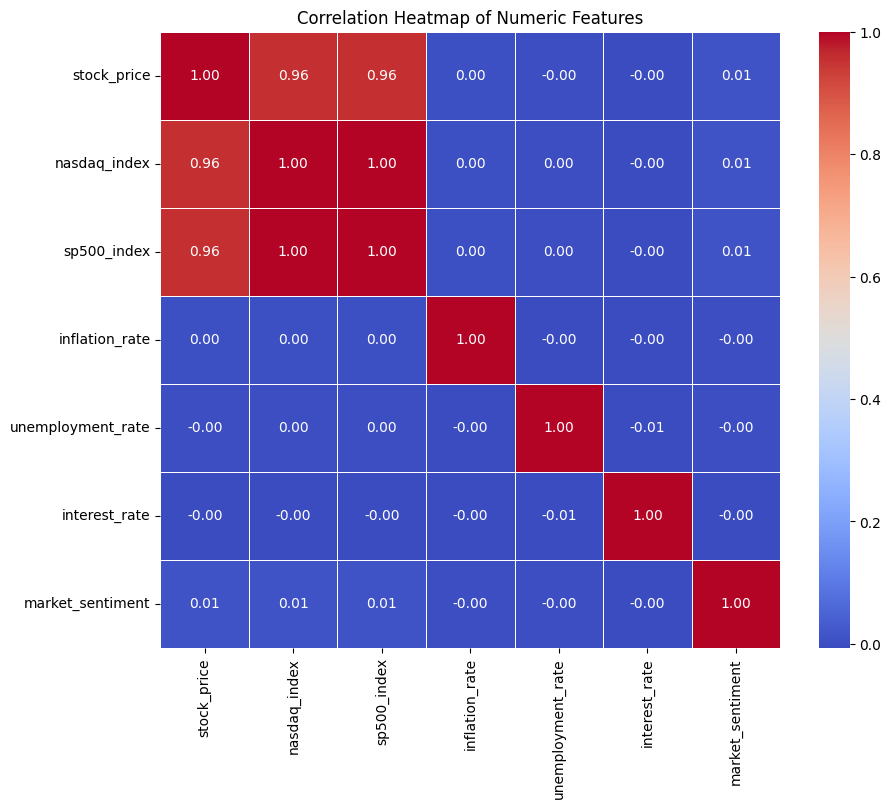

In [34]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

nasdaq_index and sp500_index are sufficient and optimal starting predictors for model fitting and forecasting stock_price.

In [35]:
# import numpy as np
# import pandas as pd
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.metrics import mean_absolute_error, mean_squared_error
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Dropout
# from tensorflow.keras.callbacks import EarlyStopping
# import matplotlib.pyplot as plt

# data = df[['stock_price']].values

# train_size = int(len(data) * 0.7)
# val_size = int(len(data) * 0.15)
# test_size = len(data) - train_size - val_size

# train_data_raw = data[:train_size]
# val_data_raw = data[train_size:train_size + val_size]
# test_data_raw = data[train_size + val_size:]

# scaler = MinMaxScaler(feature_range=(0, 1))
# train_scaled = scaler.fit_transform(train_data_raw)
# val_scaled = scaler.transform(val_data_raw)
# test_scaled = scaler.transform(test_data_raw)

# time_step = 90

# full_val_data = np.concatenate((train_scaled[-time_step:], val_scaled))
# full_test_data = np.concatenate((val_scaled[-time_step:], test_scaled))

# def create_sequences(data_array, time_step=90):
#     X, y = [], []
#     for i in range(time_step, len(data_array)):
#         X.append(data_array[i - time_step:i, 0])
#         y.append(data_array[i, 0])
#     return np.array(X), np.array(y)

# X_train, y_train = create_sequences(train_scaled, time_step)
# X_val, y_val = create_sequences(full_val_data, time_step)
# X_test, y_test = create_sequences(full_test_data, time_step)

# X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
# X_val = X_val.reshape(X_val.shape[0], X_val.shape[1], 1)
# X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# model = Sequential()
# model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(time_step, 1)))
# model.add(MaxPooling1D(pool_size=2))
# model.add(Dropout(0.3))
# model.add(LSTM(128, return_sequences=True))
# model.add(Dropout(0.3))
# model.add(LSTM(128, return_sequences=False))
# model.add(Dropout(0.3))
# model.add(Dense(1, activation='linear'))
# model.compile(optimizer='nadam', loss='mean_squared_error')

# early_stop = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

# history = model.fit(
#     X_train,
#     y_train,
#     batch_size=16,
#     epochs=100,
#     validation_data=(X_val, y_val),
#     callbacks=[early_stop],
#     verbose=1
# )

# predicted_stock_price_scaled = model.predict(X_test)

# pad_pred = np.zeros((predicted_stock_price_scaled.shape[0], data.shape[1]))
# pad_pred[:, 0] = predicted_stock_price_scaled[:, 0]
# predicted_stock_price = scaler.inverse_transform(pad_pred)[:, 0]

# pad_actual = np.zeros((y_test.shape[0], data.shape[1]))
# pad_actual[:, 0] = y_test
# y_test_actual_unscaled = scaler.inverse_transform(pad_actual)[:, 0]

# mae = mean_absolute_error(y_test_actual_unscaled, predicted_stock_price)
# rmse = np.sqrt(mean_squared_error(y_test_actual_unscaled, predicted_stock_price))
# print("MAE:", mae)
# print("RMSE:", rmse)

# plot_start_index = train_size + val_size

# plt.figure(figsize=(15, 6))
# plt.plot(df.index[plot_start_index:plot_start_index + len(y_test_actual_unscaled)], y_test_actual_unscaled, label='Actual Stock Price')
# plt.plot(df.index[plot_start_index:plot_start_index + len(predicted_stock_price)], predicted_stock_price, label='Predicted Stock Price')
# plt.title('CNN-LSTM Stock Price Prediction')
# plt.xlabel('Date')
# plt.ylabel('Stock Price')
# plt.legend()
# plt.grid(True)
# plt.show()

# MAE: 52.80975552742227
# RMSE: 59.93357688139426

# **Model Training**

In [ ]:
import numpy as np
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Compute logarithmic returns to stabilize variance
df['log_return'] = np.log1p(df['stock_price'].pct_change())
df['log_return'] = df['log_return'].bfill()  

# Define features (external regressors) and target variable
features = ['nasdaq_index', 'sp500_index', 'inflation_rate', 'unemployment_rate', 'interest_rate', 'market_sentiment']
target = 'log_return'

# Define SARIMAX model parameters
sarimax_order = (1, 0, 1)
seasonal_order = (0, 0, 0, 5)

# External features for SARIMAX
exog = df[features]

# Train SARIMAX model on log returns with exogenous features
sarimax_model = SARIMAX(df[target], order=sarimax_order, seasonal_order=seasonal_order, exog=exog)
sarimax_fit = sarimax_model.fit(disp=False)

# Predict using SARIMAX model
sarimax_pred = sarimax_fit.predict(start=0, end=len(df)-1, exog=exog)

# Calculate residuals (error between actual and predicted log returns)
residuals = (df[target] - sarimax_pred.values).astype(np.float32)

# Scale residuals between -1 and 1 for LSTM training
scaler = MinMaxScaler(feature_range=(-1, 1))
residuals_scaled = scaler.fit_transform(residuals.values.reshape(-1, 1))

# Function to create time-step sequences for LSTM input
def create_sequences(data, time_step=60):
    X, y = [], []
    for i in range(time_step, len(data)):
        X.append(data[i-time_step:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

# Create sequences of residuals for LSTM
time_step = 60
X, y = create_sequences(residuals_scaled, time_step)
X = X.reshape((X.shape[0], X.shape[1], 1))

# Split data into training and testing sets
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Build LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
lstm_model.add(Dropout(0.2))
lstm_model.add(LSTM(50, return_sequences=False))
lstm_model.add(Dropout(0.2))
lstm_model.add(Dense(1))

# Compile and train LSTM model
lstm_model.compile(optimizer='adam', loss='mean_squared_error')
history = lstm_model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=32, verbose=1)

# Predict residuals using LSTM
y_pred_lstm_scaled = lstm_model.predict(X_test)
y_pred_lstm = scaler.inverse_transform(y_pred_lstm_scaled)

# Get SARIMAX predictions for the same test period
sarimax_test_pred = sarimax_pred.values[-len(y_test):]

# Combine SARIMAX predictions with LSTM residual predictions to form hybrid forecast
hybrid_pred = sarimax_test_pred + y_pred_lstm.flatten()
actual_test = df[target].values[-len(y_test):]

# Evaluate hybrid model performance
rmse = np.sqrt(mean_squared_error(actual_test, hybrid_pred))
rme = np.mean(np.abs((actual_test - hybrid_pred) / actual_test)) * 100

print("Hybrid SARIMAX+LSTM RMSE:", rmse)
print("Hybrid SARIMAX+LSTM RME (%):", rme)

# Plot actual vs predicted values
plt.figure(figsize=(12,6))
plt.plot(df.index[-len(y_test):], actual_test, label='Actual', color='blue')
plt.plot(df.index[-len(y_test):], hybrid_pred, label='Hybrid Predicted', color='red')
plt.title('Hybrid SARIMAX + LSTM Stock Prediction')
plt.xlabel('Date')
plt.ylabel('Log Return')
plt.legend()
plt.show()




c:\Users\Nisha\anaconda3\envs\dsenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Nisha\anaconda3\envs\dsenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Nisha\anaconda3\envs\dsenv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\Nisha\anaconda3\envs\dsenv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the

Epoch 1/50
1011/1011 ━━━━━━━━━━━━━━━━━━━━ 128s 116ms/step - loss: 0.0024 - val_loss: 9.9637e-04
Epoch 2/50
1011/1011 ━━━━━━━━━━━━━━━━━━━━ 121s 119ms/step - loss: 0.0024 - val_loss: 9.8513e-04
Epoch 3/50
1011/1011 ━━━━━━━━━━━━━━━━━━━━ 121s 119ms/step - loss: 0.0023 - val_loss: 9.4869e-04
Epoch 4/50
1011/1011 ━━━━━━━━━━━━━━━━━━━━ 113s 112ms/step - loss: 0.0023 - val_loss: 9.5863e-04
Epoch 5/50
1011/1011 ━━━━━━━━━━━━━━━━━━━━ 146s 116ms/step - loss: 0.0023 - val_loss: 9.5067e-04
Epoch 6/50
1011/1011 ━━━━━━━━━━━━━━━━━━━━ 124s 123ms/step - loss: 0.0023 - val_loss: 9.6409e-04
Epoch 7/50
1011/1011 ━━━━━━━━━━━━━━━━━━━━ 137s 117ms/step - loss: 0.0023 - val_loss: 9.8774e-04
Epoch 8/50
1011/1011 ━━━━━━━━━━━━━━━━━━━━ 116s 114ms/step - loss: 0.0023 - val_loss: 9.5546e-04
Epoch 9/50
1011/1011 ━━━━━━━━━━━━━━━━━━━━ 115s 114ms/step - loss: 0.0023 - val_loss: 9.6573e-04
Epoch 10/50
1011/1011 ━━━━━━━━━━━━━━━━━━━━ 129s 127ms/step - loss: 0.0023 - val_loss: 9.5586e-04
Epoch 11/50
1011/1011 ━━━━━━━━━━━━━━━━━

In [ ]:
import joblib

# Save SARIMAX model
joblib.dump(sarimax_fit, "sarimax_model.pkl")

# Save LSTM model
lstm_model.save("lstm_model.h5")

# Save the residual scaler
joblib.dump(scaler, "residual_scaler.pkl")


['residual_scaler.pkl']

In [ ]:
print("Columns in your dataset:", df.columns.tolist())


Columns in your dataset: ['stock_price', 'nasdaq_index', 'sp500_index', 'inflation_rate', 'unemployment_rate', 'interest_rate', 'market_sentiment', 'log_return']


In [ ]:
# Move the index into a proper column
df.reset_index(inplace=True)  # This moves the index into a column named 'index'

In [ ]:


# If your index column is called 'DatetimeIndex', rename it
if 'timestamp' in df.columns:
    df.rename(columns={'timestamp': 'Date'}, inplace=True)

# Ensure it's datetime type
df['Date'] = pd.to_datetime(df['Date'])

# Save CSV with actual dates
df.to_csv("preloaded_data.csv", index=False)


c:\Users\Nisha\anaconda3\envs\dsenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Nisha\anaconda3\envs\dsenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


                  Date  Forecasted_Price
0  2021-05-29 20:00:00        508.376504
1  2021-05-30 20:00:00        508.909520
2  2021-05-31 20:00:00        500.801613
3  2021-06-01 20:00:00        498.350883
4  2021-06-02 20:00:00        503.964364
5  2021-06-03 20:00:00        500.675687
6  2021-06-04 20:00:00        499.033803
7  2021-06-05 20:00:00        495.197748
8  2021-06-06 20:00:00        499.088552
9  2021-06-07 20:00:00        503.404739
10 2021-06-08 20:00:00        498.495378
11 2021-06-09 20:00:00        490.612752
12 2021-06-10 20:00:00        500.686682
13 2021-06-11 20:00:00        506.390760
14 2021-06-12 20:00:00        502.068756
15 2021-06-13 20:00:00        503.435489
16 2021-06-14 20:00:00        502.164326
17 2021-06-15 20:00:00        503.226260
18 2021-06-16 20:00:00        504.256651
19 2021-06-17 20:00:00        505.848280
20 2021-06-18 20:00:00        494.323543
21 2021-06-19 20:00:00        486.475723
22 2021-06-20 20:00:00        490.176791
23 2021-06-21 20

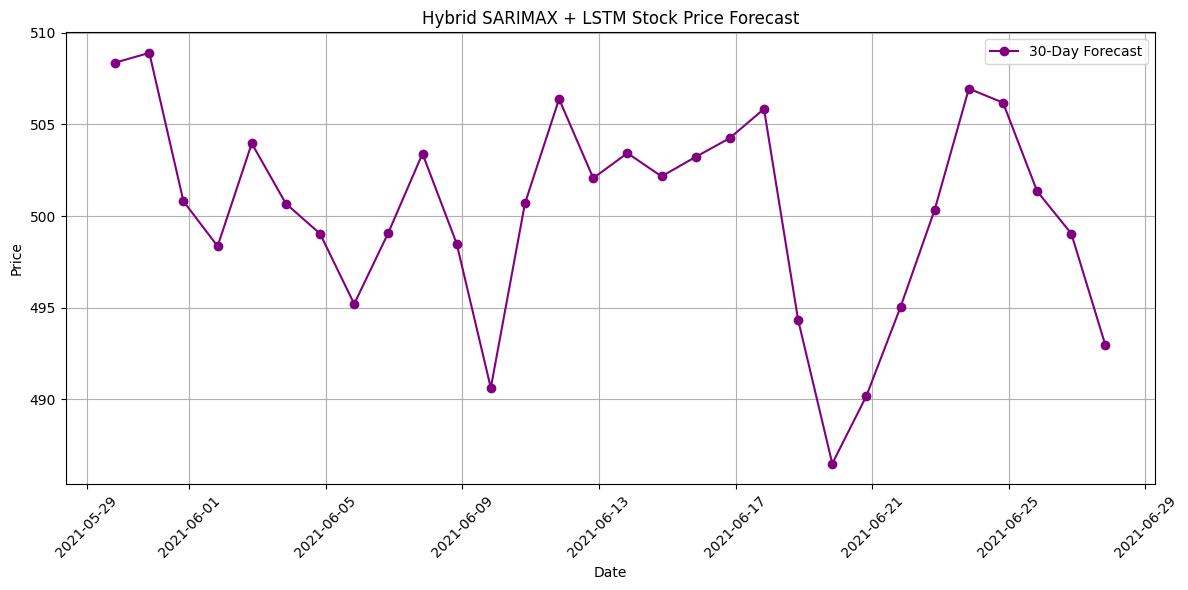

In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import load_model
import joblib
import matplotlib.pyplot as plt

# ---------------------------
# Load pre-trained models
# ---------------------------
sarimax_fit = joblib.load("sarimax_model.pkl")
lstm_model = load_model("lstm_model.h5")
scaler = joblib.load("residual_scaler.pkl")

# ---------------------------
# Load preloaded dataset
# ---------------------------
df = pd.read_csv("preloaded_data.csv")
df.columns = df.columns.str.strip()

# Ensure Date column is datetime
df['Date'] = pd.to_datetime(df['Date'])

features = ['nasdaq_index', 'sp500_index', 'inflation_rate',
            'unemployment_rate', 'interest_rate', 'market_sentiment']

time_step = 60
future_days = 30

# ---------------------------
# Compute residuals and scale
# ---------------------------
# Compute residuals and scale
residuals = df['log_return'].values - sarimax_fit.predict(start=0, end=len(df)-1, exog=df[features])

# Convert to NumPy array and reshape
residuals_scaled = scaler.transform(np.array(residuals).reshape(-1, 1))

last_residuals = residuals_scaled[-time_step:].reshape(1, time_step, 1)


# Standard deviation of residuals for realistic variation
resid_std = residuals_scaled[-time_step:].std()

# ---------------------------
# Prepare exogenous variables for future SARIMAX forecast
# ---------------------------
future_exog = df[features].iloc[-1:].values
future_exog = np.repeat(future_exog, future_days, axis=0)

# SARIMAX forecast
future_sarimax = sarimax_fit.forecast(steps=future_days, exog=future_exog)

# ---------------------------
# Combine SARIMAX forecast with LSTM-predicted residuals
# ---------------------------
future_pred = []
temp_resid_input = last_residuals.copy()

for i in range(future_days):
    lstm_resid = lstm_model.predict(temp_resid_input, verbose=0)[0,0]
    
    # Add small random variation based on past residual std
    lstm_resid += np.random.randn() * resid_std

    pred = future_sarimax.iloc[i] + scaler.inverse_transform([[lstm_resid]])[0,0]
    future_pred.append(pred)

    temp_resid_input = np.append(temp_resid_input[:,1:,:], [[[lstm_resid]]], axis=1)

# ---------------------------
# Convert log returns to prices
# ---------------------------
last_price = df['stock_price'].iloc[-1]
price_forecast = [last_price]
for r in future_pred:
    price_forecast.append(price_forecast[-1] * np.exp(r))
price_forecast = price_forecast[1:]

# ---------------------------
# Forecast dates
# ---------------------------
last_date = df['Date'].iloc[-1]
forecast_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=future_days, freq='D')

# ---------------------------
# Final DataFrame
# ---------------------------
forecast_df = pd.DataFrame({
    'Date': forecast_dates,
    'Forecasted_Price': price_forecast
})

# ---------------------------
# Output and plot
# ---------------------------
print(forecast_df)

plt.figure(figsize=(12,6))
plt.plot(forecast_dates, price_forecast, label='30-Day Forecast', color='purple', marker='o')
plt.title('Hybrid SARIMAX + LSTM Stock Price Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
